<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.856 · Anàlisi de sentiments i xarxes socials</p>
<p style="margin: 0; text-align:right;">Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Analisis de grafos y redes sociales
## Práctica: Análisis de datos de Twitter

## Adquisición de datos

In [24]:
# Imports

%matplotlib inline
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import tweepy
from networkx.algorithms.community import modularity_max as nxmod
from networkx.algorithms import community as nxcom

In [45]:
# Credencials
consumer_key = 'tVdGkoxY9fuUwmK5MTcXPOZZ7'
consumer_secret = 'WrpMA5F0IxmXPLgUVEcYxJ2jk5oGtZRTyiQrqSV4NLv99DMbcW'
access_token = '990678531230306305-2cLLqzIKkVL5UDQv8cgYivdIVquC7QY'
access_token_secret = 'UG37IoTOyhAFIwyealH2KDvsWN5TwcHzL8SEybLvOCBU1'

# Crear objecte api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

tweets = []
for tweet in tweepy.Cursor(api.search,q="#EspanyolBarça", tweet_mode = 'extended').items(20000):
    tweets.append(tweet._json)

In [34]:
# Disposem de dos datasets accessibles: el dataset original tweets_bkp, amb 3200 tweets, i el dataset tweets, amb 20000 tweets.

# tweets_bkp = tweets
# tweets_12h = tweets

In [61]:
print(tweets[0])

{'created_at': 'Sun Jan 05 12:49:44 +0000 2020', 'id': 1213804775634018305, 'id_str': '1213804775634018305', 'text': "RT @RCDEspanyol: 𝗝𝗢 𝗧'𝗘𝗦𝗧𝗜𝗠𝗢, 𝗘𝗦𝗣𝗔𝗡𝗬𝗢𝗟! 💙\n\n#Volem | #EspanyoldeBarcelona | #RCDE | #EspanyolBarça https://t.co/Rszuah5xzW", 'truncated': False, 'entities': {'hashtags': [{'text': 'Volem', 'indices': [43, 49]}, {'text': 'EspanyoldeBarcelona', 'indices': [52, 72]}, {'text': 'RCDE', 'indices': [75, 80]}, {'text': 'EspanyolBarça', 'indices': [83, 97]}], 'symbols': [], 'user_mentions': [{'screen_name': 'RCDEspanyol', 'name': 'RCD Espanyol de Barcelona', 'id': 114516774, 'id_str': '114516774', 'indices': [3, 15]}], 'urls': [], 'media': [{'id': 1213635975424950272, 'id_str': '1213635975424950272', 'indices': [98, 121], 'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1213635975424950272/img/dVdYb09ZuaQYd6Rn.jpg', 'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1213635975424950272/img/dVdYb09ZuaQYd6Rn.jpg', 'url': 'https://t.co/Rszuah5xzW', 'display_url': 

In [82]:
# Calcul de tipologia de tweets
retweets = 0
quotes = 0
replies = 0

for tweet in range(0,len(tweets)):
    try:
        if tweets[tweet]['quoted_status']:
            quotes += 1
    except:
        pass
    
    try:
        if tweets[tweet]['retweeted_status']:
            retweets += 1
    except:
        pass

    try:
        if tweets[tweet]['in_reply_to_screen_name']:
            replies += 1
    except:
        pass

    
print("En el conjunt de dades tenim {} tweets, que es categoritzen en {} retweets, {} quotes, {} replies i {} tweets aïllats.".format(len(tweets),retweets,quotes,replies,len(tweets)-retweets-quotes-replies))

En el conjunt de dades tenim 20000 tweets, que es categoritzen en 15150 retweets, 134 quotes, 326 replies i 4390 tweets aïllats.


In [83]:
T=nx.Graph()
    
for tweet in range(0,len(tweets)):
    try:
        if tweets[tweet]['quoted_status']:
            T.add_edge(tweets[tweet]['user']['screen_name'], tweets[tweet]['quoted_status']['user']['screen_name'])
    except:
        pass

    try:
        if tweets[tweet]['retweeted_status']:
            T.add_edge(tweets[tweet]['user']['screen_name'], tweets[tweet]['retweeted_status']['user']['screen_name'])
    except:
        pass

    try:
        if tweets[tweet]['in_reply_to_screen_name']:
            T.add_edge(tweets[tweet]['user']['screen_name'], tweets[tweet]['in_reply_to_screen_name'])
    except:
        pass

In [86]:
sorted(nx.degree(T),key = lambda x: x[1], reverse = True)[:20]

[('RCDEspanyol', 1783),
 ('FCBarcelona', 1552),
 ('LaLigaEN', 1177),
 ('FCBarcelona_es', 1091),
 ('LaLiga', 536),
 ('Zona_Blaugrana', 308),
 ('ActuFoot_', 291),
 ('footmercato', 260),
 ('OptaJose', 190),
 ('GuimGG', 145),
 ('fcbarcelona_fra', 144),
 ('FCBarcelona_cat', 141),
 ('Barcaforlife_', 131),
 ('madridblaugrana', 124),
 ('FCBW_A7', 119),
 ('MessixFCB', 118),
 ('EsportsSER', 112),
 ('albertdmcat', 103),
 ('LaLigaArab', 102),
 ('fcbarcelona_ara', 99)]

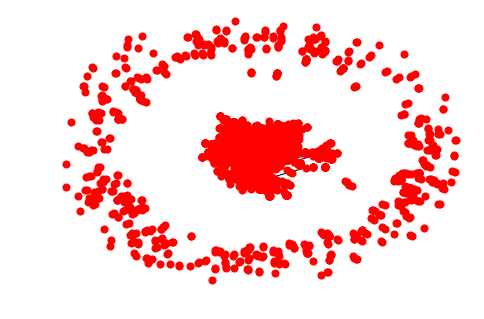

In [87]:
nx.draw(T, pos=nx.spring_layout(T), node_size = 50)

In [88]:
nx.write_graphml(T, "PRA1export.graphml")

# Comunitats

In [89]:
# definimos una función que muestre el grafo, mostrando cada grupo de nodos con un color distinto
def draw_graph_node_colors(g, nodes=[]):
    pos = nx.kamada_kawai_layout(g)
    # mostramos las aristas
    nx.draw_networkx_edges(g, pos=pos)
    cmap = plt.cm.hsv
    for i, group in enumerate(nodes):
        # mostramos los nodos del grupo
        nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=cmap(i/len(nodes)))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

S'han detectat 320 comunitats: 
- Comunitat 0 amb 1810 nodes;
- Comunitat 1 amb 1268 nodes;
- Comunitat 2 amb 1094 nodes;
- Comunitat 3 amb 910 nodes;
- Comunitat 4 amb 621 nodes;
- Comunitat 5 amb 559 nodes;
- Comunitat 6 amb 508 nodes;
- Comunitat 7 amb 451 nodes;
- Comunitat 8 amb 339 nodes;
- Comunitat 9 amb 248 nodes;
- Comunitat 10 amb 196 nodes;
- Comunitat 11 amb 128 nodes;
- Comunitat 12 amb 128 nodes;
- Comunitat 13 amb 118 nodes;
- Comunitat 14 amb 118 nodes;
- Comunitat 15 amb 67 nodes;
- Comunitat 16 amb 52 nodes;
- Comunitat 17 amb 52 nodes;
- Comunitat 18 amb 47 nodes;
- Comunitat 19 amb 43 nodes;
- Comunitat 20 amb 24 nodes;
- Comunitat 21 amb 23 nodes;
- Comunitat 22 amb 22 nodes;
- Comunitat 23 amb 21 nodes;
- Comunitat 24 amb 21 nodes;
- Comunitat 25 amb 19 nodes;
- Comunitat 26 amb 17 nodes;
- Comunitat 27 amb 16 nodes;
- Comunitat 28 amb 15 nodes;
- Comunitat 29 amb 11 nodes;
- Comunitat 30 amb 11 nodes;
- Comunitat 31 amb 10 nodes;
- Comunitat 32 amb 10 nodes;
- C

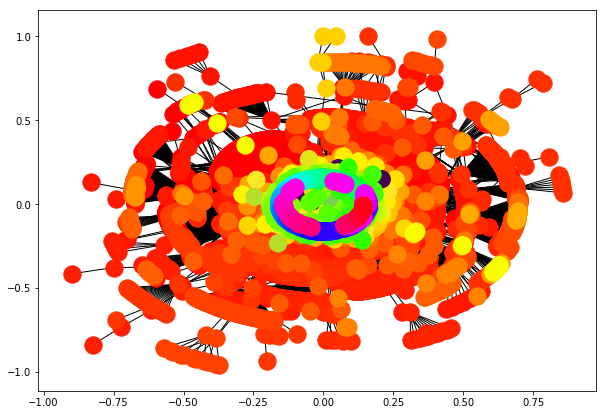

In [90]:
# Greedy Modularity Communities
com_mod = nxmod.greedy_modularity_communities(T)
# Mostrem les comunitats detectades.
plt.figure(num=None, figsize=(10, 7))
draw_graph_node_colors(T, com_mod)
print("S'han detectat {} comunitats: ".format(len(com_mod)))
for i, c in enumerate(com_mod):
    print("- Comunitat {} amb {} nodes;".format(i, len(c)))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

S'han detectat 286 comunitats: 
- Comunitat 0 amb 8819 nodes;
- Comunitat 1 amb 2 nodes;
- Comunitat 2 amb 117 nodes;
- Comunitat 3 amb 2 nodes;
- Comunitat 4 amb 4 nodes;
- Comunitat 5 amb 6 nodes;
- Comunitat 6 amb 1 nodes;
- Comunitat 7 amb 2 nodes;
- Comunitat 8 amb 1 nodes;
- Comunitat 9 amb 7 nodes;
- Comunitat 10 amb 2 nodes;
- Comunitat 11 amb 3 nodes;
- Comunitat 12 amb 4 nodes;
- Comunitat 13 amb 7 nodes;
- Comunitat 14 amb 2 nodes;
- Comunitat 15 amb 2 nodes;
- Comunitat 16 amb 2 nodes;
- Comunitat 17 amb 2 nodes;
- Comunitat 18 amb 2 nodes;
- Comunitat 19 amb 5 nodes;
- Comunitat 20 amb 2 nodes;
- Comunitat 21 amb 4 nodes;
- Comunitat 22 amb 3 nodes;
- Comunitat 23 amb 11 nodes;
- Comunitat 24 amb 2 nodes;
- Comunitat 25 amb 3 nodes;
- Comunitat 26 amb 2 nodes;
- Comunitat 27 amb 2 nodes;
- Comunitat 28 amb 5 nodes;
- Comunitat 29 amb 2 nodes;
- Comunitat 30 amb 8 nodes;
- Comunitat 31 amb 6 nodes;
- Comunitat 32 amb 8 nodes;
- Comunitat 33 amb 2 nodes;
- Comunitat 34 amb 2

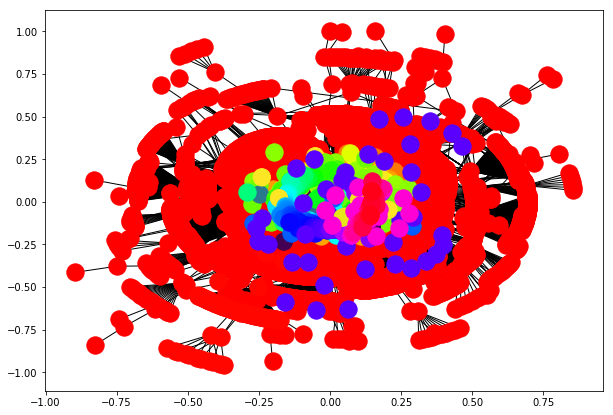

In [92]:
# Obtenim una divisió en comunitats amb Girvan Newman.
coms_gn = nxcom.girvan_newman(T)
one_part_gn = next(coms_gn)

# Mostrem les comunitats gràficament.
plt.figure(num=None, figsize=(10, 7))
draw_graph_node_colors(T, one_part_gn)
print("S'han detectat {} comunitats: ".format(len(one_part_gn)))
for i, c in enumerate(one_part_gn):
    print("- Comunitat {} amb {} nodes;".format(i, len(c)))

In [40]:
def draw_graph_node_size_prop(g, prop, max_size=500, min_size=20, pos=None, return_pos=False):
    if pos is None:
        pos = nx.kamada_kawai_layout(g)
    # Mostrem cada node, usant com a mida el valor que indica el diccionari prop, 
    # normalitzat en l'interval [min_size, max_size].
    r = float(max(prop.values()) - min(prop.values()))
    r = 1 if r==0 else r
    n, p = zip(*[(no, min_size+(max_size-min_size)*si/r) for no, si in prop.items()])
    nx.draw_networkx_nodes(g, pos=pos, nodelist=n, node_size=p)
    # Mostrem totes les arestes.
    nx.draw_networkx_edges(g, pos=pos)
    
    if return_pos:
        return pos

Si busquem els nodes amb major centralitat de grau i centralitat d'intermediació, obtenim que els millors candidats són, respectivament, els nodes ['RCDEspanyol', 'FCBarcelona', 'LaLiga', 'FCBarcelona_es', 'LaLigaEN'] i ['RCDEspanyol', 'FCBarcelona', 'LaLiga', 'FCBarcelona_es', 'LaLigaEN'].


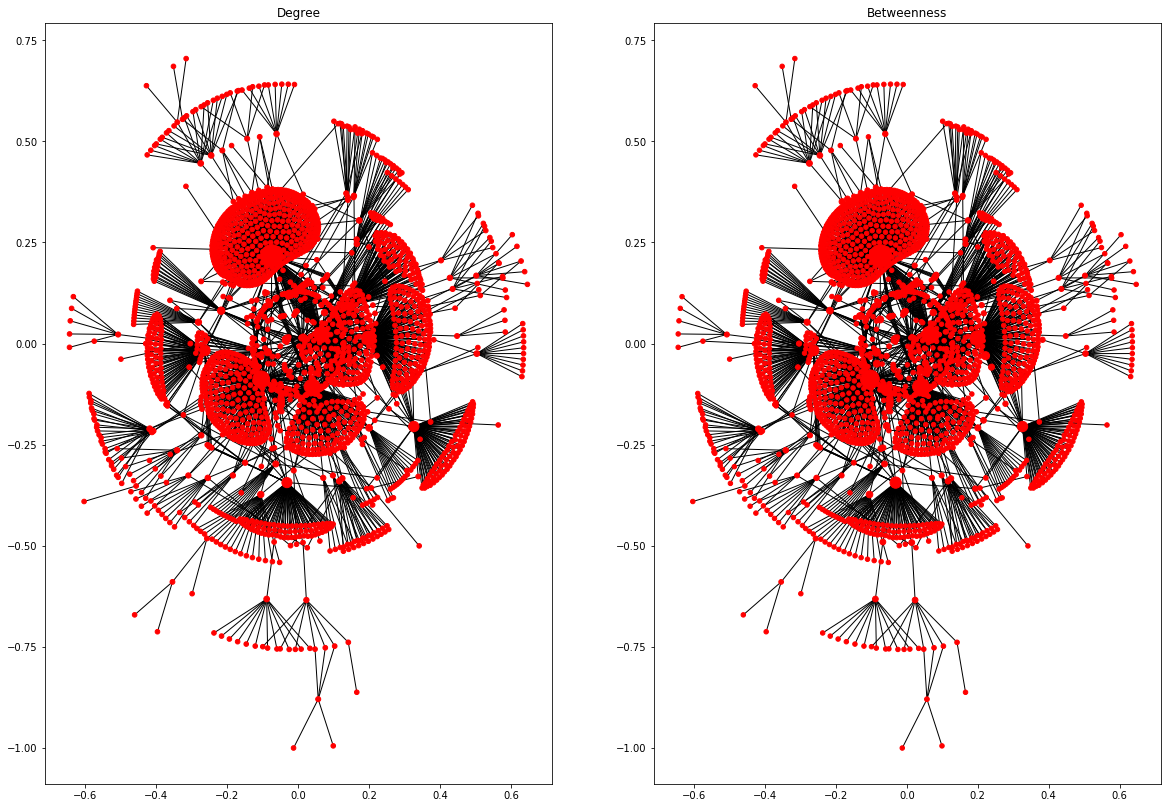

In [43]:
plt.figure(num=None, figsize=(20, 14))

ax = plt.subplot(1, 2, 1)
ax.set_title("Degree")
draw_graph_node_size_prop(T, dict(nx.degree_centrality(T)))

ax = plt.subplot(1, 2, 2)
ax.set_title("Betweenness")
draw_graph_node_size_prop(T, nx.betweenness_centrality(T))

d = dict(nx.betweenness_centrality(T))
dc = sorted(d, key=d.get, reverse=True)[:5]

b = nx.betweenness_centrality(T)
bc = sorted(b, key=b.get, reverse=True)[:5]

print("Si busquem els nodes amb major centralitat de grau i centralitat d'intermediació, obtenim que els millors candidats són, respectivament, els nodes {} i {}.".format(dc,bc))

# Paraules més recurrents

Amb l'algoritme de Louvain aplicat al cas d'estudi s'han obtingut 319 comunitats diferents, de les quals les 5 més grans són les següents:
- La comunitat 1 amb 1426 usuaris, el que suposa un 14.77% del total d'usuaris;
- La comunitat 12 amb 1190 usuaris, el que suposa un 12.32% del total d'usuaris;
- La comunitat 3 amb 1077 usuaris, el que suposa un 11.15% del total d'usuaris;
- La comunitat 2 amb 893 usuaris, el que suposa un 9.25% del total d'usuaris;
- La comunitat 5 amb 739 usuaris, el que suposa un 7.65% del total d'usuaris;
La modularitat és: 0.8017622248052827
Per a les cinc comunitats més importants obtingudes, obtenim els wordclouds següents:


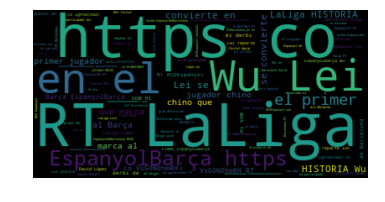

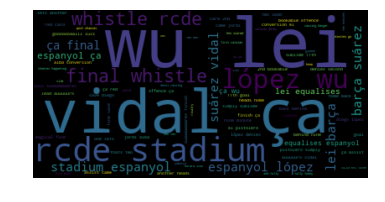

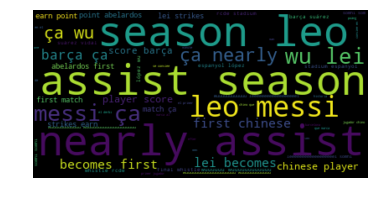

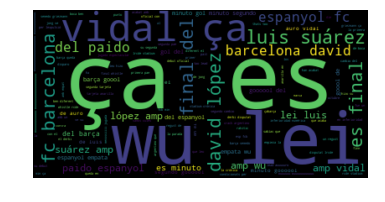

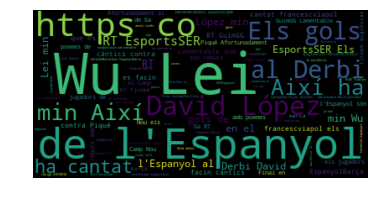

In [91]:
import re
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Importem la llibreria community.
import community
from collections import Counter

df = pd.DataFrame(columns=['user', 'tweet'])
for i in range(0,len(tweets_bkp)):
    user = tweets_bkp[i]['user']['screen_name']
    text = tweets_bkp[i]['text']
    df.loc[i] = [user, text]

part_df = pd.DataFrame(list(part.items()))
part_df.columns = ['user', 'category']
mer = pd.merge(df, part_df, on='user')

end = mer.groupby('category')['tweet'].apply(lambda tags: ','.join(tags))

part = community.best_partition(T)
mod = community.modularity(part, T)
tot = len(part)
val = 5

res = Counter(part.values())
print("Amb l'algoritme de Louvain aplicat al cas d'estudi s'han obtingut {} comunitats diferents, de les quals les {} més grans són les següents:".format(len(res),val))
for i in range(0,val):
    com = res.most_common(val)[i][0]
    per = res.most_common(val)[i][1]
    print("- La comunitat {} amb {} usuaris, el que suposa un {}% del total d'usuaris;".format(com,per,round(100*per/tot,2)))

print("La modularitat és: " + str(mod))

## Netegem tots els valors que volem descartar
for i in (res.most_common(val)[0][0],res.most_common(val)[1][0],res.most_common(val)[2][0],res.most_common(val)[3][0],res.most_common(val)[4][0]):
    end[i] = re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|('[^A-Za-z0-9]+')|(\w+:\/\/\S+)","",end[i].lower())
    end[i] = re.sub("rt","", end[i])
    end[i] = re.sub(r"\s+"," ", end[i])
    end[i] = re.sub("[!¡]","", end[i])
    end[i] = end[i].translate(str.maketrans('', '', string.punctuation))
    end[i] = re.sub(" +"," ", end[i])
    
print("Per a les cinc comunitats més importants obtingudes, obtenim els wordclouds següents:")
for i in range(0,val):
    wordcloud = WordCloud().generate(end[i])

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [96]:
mer[mer['category']==1].head(20)

,user,tweet,category
22,agrorientando,RT @FCBarcelona: ⏰ Final whistle at the RCDE S...,1
36,mamadou_dd,RT @FCBarcelona: ⚽ 88' Wu Lei equalises for Es...,1
93,madridismowikmi,RT @FCBarcelona: ⚽ 88' Wu Lei equalises for Es...,1
94,madridismowikmi,RT @RCDEspanyol: WUUUUUU! ⚽️\n\nWUUUUUUUUUUUU!...,1
118,alexjunih,RT @FCBarcelona: ⚽ 88' Wu Lei equalises for Es...,1
146,danielcostaaaaa,RT @FCBarcelona: ⚽ AND THAT'S TWO! WE LEAD!\nA...,1
157,KwameAgyare16,RT @FCBarcelona: ⏰ Final whistle at the RCDE S...,1
181,IFEANYI97911198,RT @FCBarcelona: ⏰ Final whistle at the RCDE S...,1
293,maxdnz7,RT @FCBarcelona: ⚽ 88' Wu Lei equalises for Es...,1
296,Gizmo8mai1996,RT @FCBarcelona: ⚽ 88' Wu Lei equalises for Es...,1
